In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Exploring how to reshape a csv file into a single column that goes from earliest month to most recent month.

In [2]:
Employ_Total_nonfarm = pd.read_csv("data/Employment/Total_nonfarm.csv")
Employ_Total_nonfarm.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,130841,131053,131288,131602,131703,131939,131999.0,132125.0,132358.0,132562.0,132694.0,132896.0
1,2012,133250,133512,133752,133834,133934,134007,134159.0,134331.0,134518.0,134677.0,134833.0,135072.0
2,2013,135263,135541,135680,135871,136093,136274,136386.0,136628.0,136815.0,137040.0,137304.0,137373.0
3,2014,137548,137714,137968,138293,138511,138837,139069.0,139257.0,139566.0,139818.0,140109.0,140377.0
4,2015,140568,140839,140910,141194,141525,141699,142001.0,142126.0,142281.0,142587.0,142824.0,143097.0


Setting the index to "Year" allows me to then use the df.stack() method to stack the data row by row (year by year), which converts the old column labels -- months -- to a new inner-most level of row labels (new level of index).

In [3]:
Employ_Total_nonfarm_indexed = Employ_Total_nonfarm.set_index(["Year"])

In [4]:
Employ_Total_nonfarm_stacked = Employ_Total_nonfarm_indexed.stack()
Employ_Total_nonfarm_stacked.head(26)

Year     
2011  Jan    130841.0
      Feb    131053.0
      Mar    131288.0
      Apr    131602.0
      May    131703.0
      Jun    131939.0
      Jul    131999.0
      Aug    132125.0
      Sep    132358.0
      Oct    132562.0
      Nov    132694.0
      Dec    132896.0
2012  Jan    133250.0
      Feb    133512.0
      Mar    133752.0
      Apr    133834.0
      May    133934.0
      Jun    134007.0
      Jul    134159.0
      Aug    134331.0
      Sep    134518.0
      Oct    134677.0
      Nov    134833.0
      Dec    135072.0
2013  Jan    135263.0
      Feb    135541.0
dtype: float64

Next repeat steps above for another industry's csv file.

In [5]:
Employ_Total_private = pd.read_csv("data/Employment/Total_private.csv")
Employ_Total_private_indexed = Employ_Total_private.set_index(["Year"])
Employ_Total_private_stacked = Employ_Total_private_indexed.stack()
Employ_Total_private_stacked.head()

Year     
2011  Jan    108583.0
      Feb    108838.0
      Mar    109096.0
      Apr    109418.0
      May    109574.0
dtype: float64

Create a new data frame by concatenating the two series (single column data frames) we generated above. Using keys, add column labels and tell pd.concat to concatenate columns by specifiying axis = 1 (default is axis = 0 which concatenates rows).

In [6]:
employ = [Employ_Total_nonfarm_stacked, Employ_Total_private_stacked]
pd.concat(employ, keys = ["Total_nonfarm", "Total_private"], axis = 1)

Total_nonfarm  Total_private
Year                                  
2011 Jan       130841.0       108583.0
     Feb       131053.0       108838.0
     Mar       131288.0       109096.0
     Apr       131602.0       109418.0
     May       131703.0       109574.0
...                 ...            ...
2021 Feb       143272.0       121791.0
     Mar       144057.0       122515.0
     Apr       144326.0       122741.0
     May       144909.0       123257.0
     Jun       145759.0       123919.0

[126 rows x 2 columns]

That works! Now, to iterate this process and make the code more elegant using a generator. 

In [7]:
industries = ['Total_nonfarm', 'Total_private', 'Mining_and_logging', 'Construction', 'Manufacturing', 'Trade_transportation_and_utilities', 'Wholesale_trade', 'Retail_trade', 'Transportation_and_warehousing', 'Utilities', 'Information', 'Financial_activities', 'Professional_and_business_services', 'Educational_and_health_services', 'Leisure_and_hospitality', 'Other_services', 'Government']

def read_Employment_files(filenames):
    for file in filenames:
        temp_df = pd.read_csv("data/Employment/" + file + ".csv").set_index(["Year"])
        yield temp_df.stack()
    
employment_data = pd.concat(read_Employment_files(industries), keys = industries, axis = 1)

employment_data

Total_nonfarm  Total_private  Mining_and_logging  Construction  \
Year                                                                       
2011 Jan       130841.0       108583.0               736.0        5427.0   
     Feb       131053.0       108838.0               739.0        5451.0   
     Mar       131288.0       109096.0               754.0        5477.0   
     Apr       131602.0       109418.0               768.0        5485.0   
     May       131703.0       109574.0               778.0        5516.0   
...                 ...            ...                 ...           ...   
2021 Feb       143272.0       121791.0               598.0        7355.0   
     Mar       144057.0       122515.0               613.0        7448.0   
     Apr       144326.0       122741.0               616.0        7439.0   
     May       144909.0       123257.0               618.0        7417.0   
     Jun       145759.0       123919.0               630.0        7410.0   

          Manufacturing  Trade_transportation_and_utilities  Wholesale_trade  \
Year                                                                           
2011 Jan        11621.0                             24721.0           5414.8   
     Feb        11654.0                             24787.0           5427.5   
     Mar        11675.0                             24845.0           5443.9   
     Apr        11704.0                             24934.0           5456.7   
     May        11713.0                             24947.0           5462.6   
...                 ...                                 ...              ...   
2021 Feb        12248.0                             27081.0           5639.1   
     Mar        12299.0                             27186.0           5658.0   
     Apr        12264.0                             27116.0           5664.9   
     May        12303.0                             27179.0           5681.5   
     Jun        12318.0                             27278.0           5702.8   

          Retail_trade  Transportation_and_warehousing  Utilities  \
Year                                                                
2011 Jan       14537.1                          4217.3      551.5   
     Feb       14558.2                          4248.2      553.3   
     Mar       14589.2                          4258.7      552.7   
     Apr       14646.2                          4277.4      553.7   
     May       14645.8                          4285.6      553.1   
...                ...                             ...        ...   
2021 Feb       15192.7                          5710.4      539.2   
     Mar       15234.6                          5753.1      539.8   
     Apr       15212.6                          5698.2      540.2   
     May       15239.3                          5718.8      539.3   
     Jun       15306.4                          5729.5      539.3   

          Information  Financial_activities  \
Year                                          
2011 Jan       2678.0                7680.0   
     Feb       2673.0                7676.0   
     Mar       2672.0                7681.0   
     Apr       2674.0                7679.0   
     May       2679.0                7702.0   
...               ...                   ...   
2021 Feb       2678.0                8774.0   
     Mar       2683.0                8787.0   
     Apr       2694.0                8804.0   
     May       2722.0                8801.0   
     Jun       2736.0                8800.0   

          Professional_and_business_services  Educational_and_health_services  \
Year                                                                            
2011 Jan                             17091.0                          20153.0   
     Feb                             17170.0                          20163.0   
     Mar                             17235.0                          20177.0   
     Apr                             17297.0                     

Save df to csv for later use.

In [8]:
employment_data.to_csv("C:\\Users\\fac_dalton\\data\\employment_data.csv")

Before concatenating all PPP data files, check a representative file to see what columns it has.

In [9]:
df_check = pd.read_csv("data/PPP/public_up_to_150k_1_210630.csv")
cols = df_check.info(show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   LoanNumber                   int64  
 1   DateApproved                 object 
 2   SBAOfficeCode                float64
 3   ProcessingMethod             object 
 4   BorrowerName                 object 
 5   BorrowerAddress              object 
 6   BorrowerCity                 object 
 7   BorrowerState                object 
 8   BorrowerZip                  object 
 9   LoanStatusDate               object 
 10  LoanStatus                   object 
 11  Term                         int64  
 12  SBAGuarantyPercentage        int64  
 13  InitialApprovalAmount        float64
 14  CurrentApprovalAmount        float64
 15  UndisbursedAmount            float64
 16  FranchiseName                object 
 17  ServicingLenderLocationID    float64
 18  ServicingLenderName          object 
 19  Se

Create ndarray of column names in df_check so that later we can compare same for all csv files to confirm all files have identical columns.

In [10]:
cols = df_check.columns.values

Create ndarray of column names in df_check so that in read_PPPfiles function below we can compare same for all csv files to confirm all files have identical columns.

In [11]:
cols = df_check.columns.values

Concatenate csv files into one df using glob.glob to return list of csv filenames in dir. Set dtype=object for columns 16 ('FranchiseName') & 50 ('NonProfit').

In [12]:
PPP_filelist = glob.glob("data/PPP/*.csv")
def read_PPPfiles(filelist):
    for f in filelist:
        file = pd.read_csv(f, dtype={'FranchiseName': object, 'NonProfit': object})
        cols_file = file.columns.values
        if np.array_equal(cols, cols_file):
            yield file
        else:
            print(f + " columns don't match.")
PPP_df = pd.concat(read_PPPfiles(PPP_filelist))
PPP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11768689 entries, 0 to 899999
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   LoanNumber                   int64  
 1   DateApproved                 object 
 2   SBAOfficeCode                float64
 3   ProcessingMethod             object 
 4   BorrowerName                 object 
 5   BorrowerAddress              object 
 6   BorrowerCity                 object 
 7   BorrowerState                object 
 8   BorrowerZip                  object 
 9   LoanStatusDate               object 
 10  LoanStatus                   object 
 11  Term                         int64  
 12  SBAGuarantyPercentage        int64  
 13  InitialApprovalAmount        float64
 14  CurrentApprovalAmount        float64
 15  UndisbursedAmount            float64
 16  FranchiseName                object 
 17  ServicingLenderLocationID    float64
 18  ServicingLenderName          object 
 19  

In [13]:
PPP_df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            899990, 899991, 899992, 899993, 899994, 899995, 899996, 899997,
            899998, 899999],
           dtype='int64', length=11768689)

Final index above is lower than expected from number of rows, so don't have unique sequence of indices. Let's reset them.

In [14]:
PPP_df = PPP_df.reset_index(drop=True)

Confirm that NAICS codes are all 6 digit.

In [15]:
PPP_df.agg({'NAICSCode': ['min', 'max']})

,NAICSCode
min,111110.0
max,999990.0


Map NAICS codes to "industries" list according to mapping analysis in "Mapping PPP NAICS codes.docx".

In [16]:
industries

['Total_nonfarm',
 'Total_private',
 'Mining_and_logging',
 'Construction',
 'Manufacturing',
 'Trade_transportation_and_utilities',
 'Wholesale_trade',
 'Retail_trade',
 'Transportation_and_warehousing',
 'Utilities',
 'Information',
 'Financial_activities',
 'Professional_and_business_services',
 'Educational_and_health_services',
 'Leisure_and_hospitality',
 'Other_services',
 'Government']

Check for rows with agriculture NAICS codes that don't correspond to logging. If present, drop them because we have employment data for only the logging subcategory of agriculture.

In [17]:
other_agriculture = PPP_df[((PPP_df['NAICSCode'] >= 110000) & (PPP_df['NAICSCode'] <= 113299)) | ((PPP_df['NAICSCode'] >= 114000) & (PPP_df['NAICSCode'] <= 119999))]
len(other_agriculture['NAICSCode'])

668242

In [18]:
PPP_df.drop(PPP_df[((PPP_df['NAICSCode'] >= 110000) & (PPP_df['NAICSCode'] <= 113299)) | ((PPP_df['NAICSCode'] >= 114000) & (PPP_df['NAICSCode'] <= 119999))].index, inplace = True)

In [19]:
PPP_df.shape

(11100447, 53)

In [20]:
PPP_df.drop(PPP_df[(PPP_df['NAICSCode']>=900000)].index, inplace=True)

In [21]:
PPP_df.shape

(10982605, 53)

Now map NAICS codes to a new columns 'Industry_type', expanding from 2 digit to 6 digit NAICS codes:

Drop 110000 - 113299 and 114000 – 119999, which are “Other_agriculture” for which I don’t have employment data.
Also Drop >=9000000 which is Government (Public Administration)
113300-113310 and 21 = “Logging_and _Mining”; 22 = “Utilities”; 23 = “Construction”; 31-33 = “Manufacturing”; 42 = “Wholesale_trade”; 44-45 = “Retail_trade”; 48-49 = “Transportation_and_warehousing”; 51 = “Information”; 
52-53 = “Financial_activities”; 54-56 = “Professional_and_business_services”; 61-62 = “Educational_and_health_services”; 
71-72 = “Leisure_and_hospitality”; 81 = “Other_services”

Include only rows with a NAICS code.

In [22]:
PPP_df = PPP_df[PPP_df['NAICSCode'].notna()]

First confirm that there are no codes between 113399 and 210000, which would also be "Other_agriculture" that is not logging. Using np.logical_and allows two conditions to be used in np.where.

In [23]:
PPP_df['Mining_and_logging'] = np.where(np.logical_and(PPP_df['NAICSCode'] >= 113300, PPP_df['NAICSCode'] <= 113399), 1000000, PPP_df['NAICSCode'])
PPP_df.agg({'Mining_and_logging': ['min', 'max']})

,Mining_and_logging
min,211111.0
max,1000000.0


Use np.select(condlist, choicelist) to map NAICS code ranges in condlist (here, NAICS_groups) to their corresponding indidustries (here, choicelist is the values list containing the industries).

In [24]:
NAICS_groups = [PPP_df['NAICSCode'].between(0, 113399), PPP_df['NAICSCode'].between(210000, 219999), PPP_df['NAICSCode'].between(220000, 229999), PPP_df['NAICSCode'].between(230000, 239999), PPP_df['NAICSCode'].between(310000, 339999), PPP_df['NAICSCode'].between(420000, 429999), PPP_df['NAICSCode'].between(440000, 459999), PPP_df['NAICSCode'].between(480000, 499999), PPP_df['NAICSCode'].between(510000, 519999), PPP_df['NAICSCode'].between(520000, 539999), PPP_df['NAICSCode'].between(540000, 569999), PPP_df['NAICSCode'].between(610000, 629999), PPP_df['NAICSCode'].between(710000, 729999), PPP_df['NAICSCode'].between(810000, 819999)]
values = ['Mining_and_logging', 'Mining_and_logging', 'Utilities', 'Construction', 'Manufacturing', 'Wholesale_trade', 'Retail_trade', 'Transportation_and_warehousing', 'Information', 'Financial_activities', 'Professional_and_business_services', 'Educational_and_health_services', 'Leisure_and_hospitality', 'Other_services']
PPP_df['Industry_Type'] = np.select(NAICS_groups, values)
PPP_df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,Mining_and_logging,Industry_Type
0,9547507704,05/01/2020,464.0,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,325510.0,Manufacturing
1,9777677704,05/01/2020,464.0,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,NaN,...,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,NaN,NaN,561730.0,Professional_and_business_services
3,6223567700,05/01/2020,920.0,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,NaN,...,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,NaN,NaN,236115.0,Construction
4,9662437702,05/01/2020,101.0,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,NaN,...,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,484210.0,Transportation_and_warehousing
5,9774337701,05/01/2020,101.0,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,NaN,...,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,332137.41,05/10/2021,326199.0,Manufacturing


In [25]:
PPP_df['Industry_Type'].unique()

array(['Manufacturing', 'Professional_and_business_services',
       'Construction', 'Transportation_and_warehousing', 'Other_services',
       'Wholesale_trade', 'Retail_trade', 'Leisure_and_hospitality',
       'Educational_and_health_services', 'Information',
       'Mining_and_logging', 'Utilities', 'Financial_activities'],
      dtype=object)

In [26]:
PPP_df[["Industry_Type", "CurrentApprovalAmount"]].groupby("Industry_Type").describe()

CurrentApprovalAmount                 \
                                                   count           mean   
Industry_Type                                                             
Construction                                   1045240.0   93919.075200   
Educational_and_health_services                1197842.0   94675.697187   
Financial_activities                            825441.0   46404.349968   
Information                                     147298.0   90699.513983   
Leisure_and_hospitality                        1189274.0   83551.752811   
Manufacturing                                   455605.0  166742.611738   
Mining_and_logging                               56385.0  133692.509737   
Other_services                                 1667398.0   35091.618514   
Professional_and_business_services             1984951.0   68610.646233   
Retail_trade                                    929404.0   59738.690285   
Transportation_and_warehousing                  978624.0   33683.040893   
Utilities                                        14061.0  134636.396778   
Wholesale_trade                                 358679.0  105587.379964   

                                                                      \
                                              std    min         25%   
Industry_Type                                                          
Construction                        309657.041287   1.00  11250.0000   
Educational_and_health_services     322695.660537   0.00  12500.0000   
Financial_activities                188659.458280   1.54   9375.0000   
Information                         340913.523720  40.00   9700.0000   
Leisure_and_hospitality             260605.205821   1.88  13700.0000   
Manufacturing                       462202.942202   1.00  15417.0000   
Mining_and_logging                  460133.071791  87.00  13900.0000   
Other_services                      132290.003310   0.00   7476.5225   
Professional_and_business_services  266547.221943   0.00   9600.0000   
Retail_trade                        206772.907060   1.00   9665.0000   
Transportation_and_warehousing      162503.551112   1.00   6250.0000   
Utilities                           418494.596945  98.00  14205.0000   
Wholesale_trade                     327810.589523  50.00  13455.0000   

                                                                        
                                          50%          75%         max  
Industry_Type                                                           
Construction                        20833.000   60973.9275  10000000.0  
Educational_and_health_services     21137.305   70289.8625  10000000.0  
Financial_activities                19714.000   25905.0000  10000000.0  
Information                         20800.000   50000.0000  10000000.0  
Leisure_and_hospitality             21875.000   70100.0000  10000000.0  
Manufacturing                       32290.000  127200.0000  10000000.0  
Mining_and_logging                  20833.320   81842.0000  10000000.0  
Other_services                      18680.000   20833.0000  10000000.0  
Professional_and_business_services  20550.000   37684.0000  10000000.0  
Retail_trade                        20300.000   36600.1375  10000000.0  
Transportation_and_warehousing      14405.000   20833.0000  10000000.0  
Utilities                           25300.000   89386.8700  10000000.0  
Wholesale_trade                     20833.000   71400.0000  10000000.0

In [27]:
import seaborn as sns
from matplotlib import pyplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Professional_and_business_services'),
  Text(2, 0, 'Construction'),
  Text(3, 0, 'Transportation_and_warehousing'),
  Text(4, 0, 'Other_services'),
  Text(5, 0, 'Wholesale_trade'),
  Text(6, 0, 'Retail_trade'),
  Text(7, 0, 'Leisure_and_hospitality'),
  Text(8, 0, 'Educational_and_health_services'),
  Text(9, 0, 'Information'),
  Text(10, 0, 'Mining_and_logging'),
  Text(11, 0, 'Utilities'),
  Text(12, 0, 'Financial_activities')])

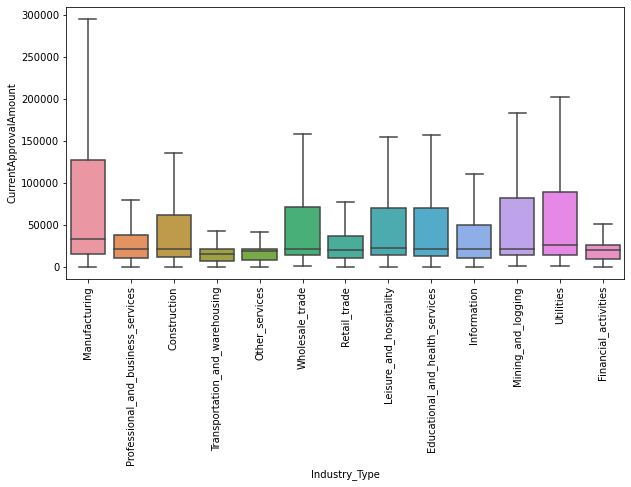

In [28]:
dims = (10, 5)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.boxplot(x=PPP_df['Industry_Type'], y=PPP_df['CurrentApprovalAmount'], showfliers=False)
plt.xticks(rotation=90)

FIGURE OUT WHY 'Mining_and_logging' is here, and delete if not needed.

In [29]:
PPP_df.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED',
       'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED', 'BusinessType', 'OriginatingLenderLocationID',
       'OriginatingLender', 'Originatin

Drop employment rows before pandemic. First reset index to more easily select rows to delete. This will convert old index levels ('Year' and month) to columns.

In [30]:
employment_data.reset_index(inplace=True)

COULD WE USE INSTEAD .iloc[0:110] below?

In [31]:
employment_data.drop(employment_data.loc[0:110].index, inplace=True)

In [32]:
employment_data

,Year,level_1,Total_nonfarm,Total_private,Mining_and_logging,Construction,Manufacturing,Trade_transportation_and_utilities,Wholesale_trade,Retail_trade,Transportation_and_warehousing,Utilities,Information,Financial_activities,Professional_and_business_services,Educational_and_health_services,Leisure_and_hospitality,Other_services,Government
111,2020,Apr,130161.0,108335.0,622.0,6535.0,11414.0,24513.0,5486.0,13235.3,5248.5,543.5,2633.0,8596.0,19082.0,21722.0,8691.0,4527.0,21826.0
112,2020,May,132994.0,111680.0,601.0,7004.0,11657.0,24934.0,5508.6,13644.1,5239.0,542.0,2594.0,8613.0,19247.0,22107.0,10146.0,4777.0,21314.0
113,2020,Jun,137840.0,116487.0,597.0,7171.0,11999.0,25934.0,5556.9,14502.8,5335.7,539.0,2602.0,8634.0,19568.0,22671.0,12158.0,5153.0,21353.0
114,2020,Jul,139566.0,118010.0,593.0,7197.0,12037.0,26205.0,5537.4,14742.9,5385.2,539.5,2592.0,8646.0,19715.0,22885.0,12824.0,5316.0,21556.0
115,2020,Aug,141149.0,119076.0,589.0,7223.0,12068.0,26553.0,5544.5,14995.8,5472.4,539.9,2617.0,8674.0,19915.0,23084.0,12963.0,5390.0,22073.0
116,2020,Sep,141865.0,120008.0,592.0,7256.0,12123.0,26662.0,5578.4,15025.3,5516.4,541.6,2659.0,8712.0,20055.0,23152.0,13357.0,5440.0,21857.0
117,2020,Oct,142545.0,120962.0,594.0,7329.0,12155.0,26847.0,5587.6,15131.8,5587.7,540.1,2650.0,8746.0,20296.0,23235.0,13622.0,5488.0,21583.0
118,2020,Nov,142809.0,121321.0,597.0,7353.0,12196.0,26983.0,5602.4,15129.7,5711.3,539.5,2650.0,8756.0,20391.0,23278.0,13632.0,5485.0,21488.0
119,2020,Dec,142503.0,121047.0,597.0,7400.0,12231.0,26984.0,5617.2,15159.8,5668.1,538.5,2659.0,8774.0,20550.0,23249.0,13134.0,5469.0,21456.0
120,2021,Jan,142736.0,121169.0,596.0,7412.0,12213.0,27023.0,5631.4,15178.3,5674.0,539.4,2672.0,8781.0,20640.0,23235.0,13117.0,5480.0,21567.0


In [33]:
employment_data.rename(columns={employment_data.columns[1]: 'Month'}, inplace=True)
employment_data.drop(labels=['Total_nonfarm', 'Total_private', 'Government', 'Trade_transportation_and_utilities'], inplace=True, axis = 1)
employment_data

,Year,Month,Mining_and_logging,Construction,Manufacturing,Wholesale_trade,Retail_trade,Transportation_and_warehousing,Utilities,Information,Financial_activities,Professional_and_business_services,Educational_and_health_services,Leisure_and_hospitality,Other_services
111,2020,Apr,622.0,6535.0,11414.0,5486.0,13235.3,5248.5,543.5,2633.0,8596.0,19082.0,21722.0,8691.0,4527.0
112,2020,May,601.0,7004.0,11657.0,5508.6,13644.1,5239.0,542.0,2594.0,8613.0,19247.0,22107.0,10146.0,4777.0
113,2020,Jun,597.0,7171.0,11999.0,5556.9,14502.8,5335.7,539.0,2602.0,8634.0,19568.0,22671.0,12158.0,5153.0
114,2020,Jul,593.0,7197.0,12037.0,5537.4,14742.9,5385.2,539.5,2592.0,8646.0,19715.0,22885.0,12824.0,5316.0
115,2020,Aug,589.0,7223.0,12068.0,5544.5,14995.8,5472.4,539.9,2617.0,8674.0,19915.0,23084.0,12963.0,5390.0
116,2020,Sep,592.0,7256.0,12123.0,5578.4,15025.3,5516.4,541.6,2659.0,8712.0,20055.0,23152.0,13357.0,5440.0
117,2020,Oct,594.0,7329.0,12155.0,5587.6,15131.8,5587.7,540.1,2650.0,8746.0,20296.0,23235.0,13622.0,5488.0
118,2020,Nov,597.0,7353.0,12196.0,5602.4,15129.7,5711.3,539.5,2650.0,8756.0,20391.0,23278.0,13632.0,5485.0
119,2020,Dec,597.0,7400.0,12231.0,5617.2,15159.8,5668.1,538.5,2659.0,8774.0,20550.0,23249.0,13134.0,5469.0
120,2021,Jan,596.0,7412.0,12213.0,5631.4,15178.3,5674.0,539.4,2672.0,8781.0,20640.0,23235.0,13117.0,5480.0


Restore multiindex with 'Year' and 'Month'.

In [34]:
employment_data.set_index(['Year', 'Month'], inplace=True)
employment_data

Mining_and_logging  Construction  Manufacturing  Wholesale_trade  \
Year Month                                                                     
2020 Apr                 622.0        6535.0        11414.0           5486.0   
     May                 601.0        7004.0        11657.0           5508.6   
     Jun                 597.0        7171.0        11999.0           5556.9   
     Jul                 593.0        7197.0        12037.0           5537.4   
     Aug                 589.0        7223.0        12068.0           5544.5   
     Sep                 592.0        7256.0        12123.0           5578.4   
     Oct                 594.0        7329.0        12155.0           5587.6   
     Nov                 597.0        7353.0        12196.0           5602.4   
     Dec                 597.0        7400.0        12231.0           5617.2   
2021 Jan                 596.0        7412.0        12213.0           5631.4   
     Feb                 598.0        7355.0        12248.0           5639.1   
     Mar                 613.0        7448.0        12299.0           5658.0   
     Apr                 616.0        7439.0        12264.0           5664.9   
     May                 618.0        7417.0        12303.0           5681.5   
     Jun                 630.0        7410.0        12318.0           5702.8   

            Retail_trade  Transportation_and_warehousing  Utilities  \
Year Month                                                            
2020 Apr         13235.3                          5248.5      543.5   
     May         13644.1                          5239.0      542.0   
     Jun         14502.8                          5335.7      539.0   
     Jul         14742.9                          5385.2      539.5   
     Aug         14995.8                          5472.4      539.9   
     Sep         15025.3                          5516.4      541.6   
     Oct         15131.8                          5587.7      540.1   
     Nov         15129.7                          5711.3      539.5   
     Dec         15159.8                          5668.1      538.5   
2021 Jan         15178.3                          5674.0      539.4   
     Feb         15192.7                          5710.4      539.2   
     Mar         15234.6                          5753.1      539.8   
     Apr         15212.6                          5698.2      540.2   
     May         15239.3                          5718.8      539.3   
     Jun         15306.4                          5729.5      539.3   

            Information  Financial_activities  \
Year Month                                      
2020 Apr         2633.0                8596.0   
     May         2594.0                8613.0   
     Jun         2602.0                8634.0   
     Jul         2592.0                8646.0   
     Aug         2617.0                8674.0   
     Sep         2659.0                8712.0   
     Oct         2650.0                8746.0   
     Nov         2650.0                8756.0   
     Dec         2659.0                8774.0   
2021 Jan         2672.0                8781.0   
     Feb         2678.0                8774.0   
     Mar         2683.0                8787.0   
     Apr         2694.0                8804.0   
     May         2722.0                8801.0   
     Jun         2736.0                8800.0   

            Professional_and_business_services  \
Year Month                                       
2020 Apr                               19082.0   
     May                               19247.0   
     Jun                               19568.0   
     Jul                               19715.0   
     Aug                               19915.0   
     Sep                               20055.0   
     Oct                               20296.0   
     Nov                               20391.0   
     Dec                               20550.0   
2021 Jan                               20640.0   
     Feb 

Find minimum employement during covid for each industry.

In [35]:
employ_min = employment_data.min()
employ_min

Mining_and_logging                      589.0
Construction                           6535.0
Manufacturing                         11414.0
Wholesale_trade                        5486.0
Retail_trade                          13235.3
Transportation_and_warehousing         5239.0
Utilities                               538.5
Information                            2592.0
Financial_activities                   8596.0
Professional_and_business_services    19082.0
Educational_and_health_services       21722.0
Leisure_and_hospitality                8691.0
Other_services                         4527.0
dtype: float64

Select the final employment record (6/2021) for each industry.

In [36]:
employ_end = employment_data.loc[(2021, 'Jun')]
employ_end = employ_end.transpose()
employ_end

Mining_and_logging                      630.0
Construction                           7410.0
Manufacturing                         12318.0
Wholesale_trade                        5702.8
Retail_trade                          15306.4
Transportation_and_warehousing         5729.5
Utilities                               539.3
Information                            2736.0
Financial_activities                   8800.0
Professional_and_business_services    20836.0
Educational_and_health_services       23537.0
Leisure_and_hospitality               14734.0
Other_services                         5640.0
Name: (2021, Jun), dtype: float64

In [37]:
employ_compare = [employ_end, employ_min]
employ_change = pd.concat(employ_compare, axis = 1)
employ_change.reset_index(inplace=True)
employ_change.columns = ["Industry", "6/2021", "min since 2/2020"]
employ_change["change"] = (employ_change['6/2021'] - employ_change['min since 2/2020'])
employ_change

,Industry,6/2021,min since 2/2020,change
0,Mining_and_logging,630.0,589.0,41.0
1,Construction,7410.0,6535.0,875.0
2,Manufacturing,12318.0,11414.0,904.0
3,Wholesale_trade,5702.8,5486.0,216.8
4,Retail_trade,15306.4,13235.3,2071.1
5,Transportation_and_warehousing,5729.5,5239.0,490.5
6,Utilities,539.3,538.5,0.8
7,Information,2736.0,2592.0,144.0
8,Financial_activities,8800.0,8596.0,204.0
9,Professional_and_business_services,20836.0,19082.0,1754.0


In [38]:
PPP_loans_total = PPP_df['CurrentApprovalAmount'].groupby([PPP_df['Industry_Type']]).sum()
PPP_loans_total.sort_index(inplace=True)
PPP_loans_df=pd.DataFrame(PPP_loans_total)
PPP_loans_df.reset_index()

,Industry_Type,CurrentApprovalAmount
0,Construction,9.816797e+10
1,Educational_and_health_services,1.134065e+11
2,Financial_activities,3.830405e+10
3,Information,1.335986e+10
4,Leisure_and_hospitality,9.936593e+10
5,Manufacturing,7.596877e+10
6,Mining_and_logging,7.538252e+09
7,Other_services,5.851169e+10
8,Professional_and_business_services,1.361888e+11
9,Retail_trade,5.552138e+10


DELET THIS?: clean up the indices below, then figure out why the PPP_loan_total series is not concating by column

MODIFY code below to sort by 'Industry'? Need to match up to order in PPP_loans_total.

In [39]:
employ_change.sort_values(by='Industry', inplace=True)

In [40]:
employ_change.reset_index(drop=True, inplace=True)
employ_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          13 non-null     object 
 1   6/2021            13 non-null     float64
 2   min since 2/2020  13 non-null     float64
 3   change            13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 544.0+ bytes


In [41]:
employ_change

,Industry,6/2021,min since 2/2020,change
0,Construction,7410.0,6535.0,875.0
1,Educational_and_health_services,23537.0,21722.0,1815.0
2,Financial_activities,8800.0,8596.0,204.0
3,Information,2736.0,2592.0,144.0
4,Leisure_and_hospitality,14734.0,8691.0,6043.0
5,Manufacturing,12318.0,11414.0,904.0
6,Mining_and_logging,630.0,589.0,41.0
7,Other_services,5640.0,4527.0,1113.0
8,Professional_and_business_services,20836.0,19082.0,1754.0
9,Retail_trade,15306.4,13235.3,2071.1


Can see that emloy_change and PPP_loans_df rows are sorted in same order (alphabetical by Industry), so reset index of PPP_loans_df and drop Industry column to prepare for concatenation.

In [42]:
PPP_loans_df.reset_index(inplace=True, drop=True)
PPP_loans_df

,CurrentApprovalAmount
0,9.816797e+10
1,1.134065e+11
2,3.830405e+10
3,1.335986e+10
4,9.936593e+10
5,7.596877e+10
6,7.538252e+09
7,5.851169e+10
8,1.361888e+11
9,5.552138e+10


Add CurrentApprovalAmount (column in PPP_loans_df) to employ_change. 

In [43]:
employ_vs_TotLoan = pd.concat([employ_change, PPP_loans_df], axis=1)
employ_vs_TotLoan

,Industry,6/2021,min since 2/2020,change,CurrentApprovalAmount
0,Construction,7410.0,6535.0,875.0,9.816797e+10
1,Educational_and_health_services,23537.0,21722.0,1815.0,1.134065e+11
2,Financial_activities,8800.0,8596.0,204.0,3.830405e+10
3,Information,2736.0,2592.0,144.0,1.335986e+10
4,Leisure_and_hospitality,14734.0,8691.0,6043.0,9.936593e+10
5,Manufacturing,12318.0,11414.0,904.0,7.596877e+10
6,Mining_and_logging,630.0,589.0,41.0,7.538252e+09
7,Other_services,5640.0,4527.0,1113.0,5.851169e+10
8,Professional_and_business_services,20836.0,19082.0,1754.0,1.361888e+11
9,Retail_trade,15306.4,13235.3,2071.1,5.552138e+10


In [44]:
employ_vs_TotLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Industry               13 non-null     object 
 1   6/2021                 13 non-null     float64
 2   min since 2/2020       13 non-null     float64
 3   change                 13 non-null     float64
 4   CurrentApprovalAmount  13 non-null     float64
dtypes: float64(4), object(1)
memory usage: 648.0+ bytes


In [45]:
employ_vs_TotLoan.to_csv("C:\\Users\\fac_dalton\\data\\employ_vs_TotLoan.csv")

In preparation for regression analysis, define predictor and scale. Note StandardScaler was instantiated in same block of code where it was loaded, but it dosesn't work on a series, so first convert to an ndarray. Define scaled data type as float. Do the same for target variable. 

In [67]:
X=employ_vs_TotLoan['CurrentApprovalAmount']
X_ndarray=X.to_numpy().reshape(-1, 1)
X_scaled=scaler.fit_transform(X_ndarray)
X_df=pd.DataFrame(X_scaled)
X_df=X_df.astype('float')
X_df=X_df.rename({0: 'CurrentApprovalAmount'}, axis=1)
X_df

,CurrentApprovalAmount
0,0.949846
1,1.320891
2,-0.507789
3,-1.115159
4,0.979015
5,0.409314
6,-1.256910
7,-0.015751
8,1.875620
9,-0.088562


THIS WORKED EXCEPT for column renaming (see above cell): Try running with y single column as ndarray. If it works, switch to that strategy at least for target and maybe also for predictors to just keep the one predictor used in regression below.

In [68]:
# y=employ_vs_TotLoan[['change', 'min since 2/2020']]
y=employ_vs_TotLoan['change']
y_ndarray=y.to_numpy().reshape(-1, 1)
y_scaled=scaler.fit_transform(y_ndarray)
y_df=pd.DataFrame(y_scaled)
y_df=y_df.astype('float')
y_df=y_df.rename({0: 'employment growth', 1: 'min since 2/2020'}, axis=1)
y_df

,employment growth
0,-0.212496
1,0.391782
2,-0.643848
3,-0.682419
4,3.109747
5,-0.193854
6,-0.748632
7,-0.059498
8,0.352568
9,0.556415


In [69]:
y=y_df['employment growth']

In [70]:
model=LinearRegression().fit(x_ndarray, y_ndarray)

In [72]:
r_sq=model.score(x_ndarray, y_ndarray)
r_sq

0.34404537096441845